In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('kidney_disease.csv')

In [3]:
df.shape

(400, 26)

In [4]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [6]:
df.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


**Missing value information**

In [7]:
df.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

**Data contains**


age - age


bp - blood pressure

sg - specific gravity

al - albumin

su - sugar

rbc - red blood cells

pc - pus cell

pcc - pus cell clumps

ba - bacteria

bgr - blood glucose random

bu - blood urea

sc - serum creatinine

sod - sodium

pot - potassium

hemo - haemoglobin

pcv - packed cell volume

wc - white blood cell count

rc - red blood cell count

htn - hypertension

dm - diabetes mellitus

cad - coronary artery disease

appet - appetite

pe - pedal edema

ane - anemia

classification - class

In [8]:
df.shape

(400, 26)

**Renaming columns to meaningful names**

In [9]:
col_dict={"bp":"blood_pressure",
          "sg":"specific_gravity",
          "al":"albumin",
          "su":"sugar",
          "rbc":"red_blood_cells",
          "pc":"pus_cell",
          "pcc":"pus_cell_clumps",
          "ba":"bacteria",
          "bgr":"blood_glucose_random",
          "bu":"blood_urea",
          "sc":"serum_creatinine",
          "sod":"sodium",
          "pot":"potassium",
          "hemo":"hemoglobin",
          "pcv":"packed_cell_volume",
          "wc":"white_blood_cell_count",
          "rc":"red_blood_cell_count",
          "htn":"hypertension",
          "dm":"diabetes_mellitus",
          "cad":"coronary_artery_disease",
          "appet":"appetite",
          "pe":"pedal_edema",
          "ane":"anemia"}

df.rename(columns=col_dict, inplace=True)

<AxesSubplot:>

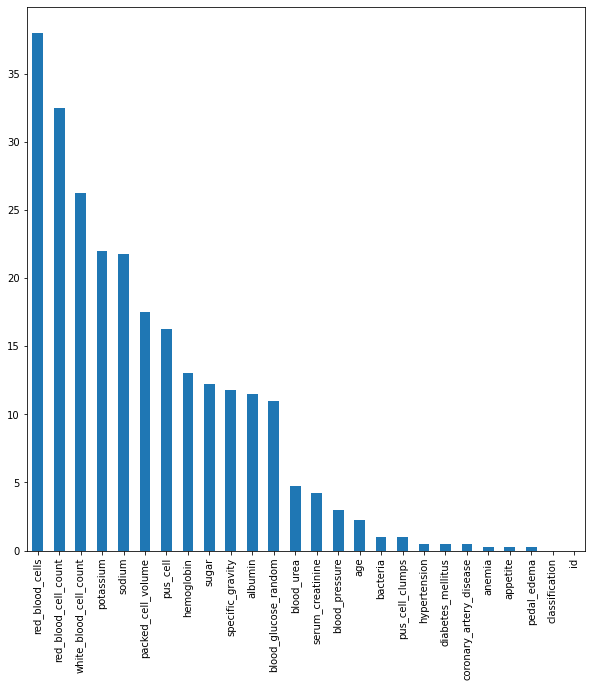

In [10]:
((df.isnull().sum()/df.shape[0])*100).sort_values(ascending=False).plot(kind='bar', figsize=(10,10))

In [11]:
numerical_features = []
categorical_features = []

for i in df.drop('classification', axis=1).columns:
    if df[i].nunique()>7:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

In [12]:
for string_column in ["red_blood_cell_count","pus_cell","pus_cell_clumps","bacteria","hypertension","diabetes_mellitus","coronary_artery_disease","pedal_edema","anemia","appetite","classification"]:
  df[string_column]=df[string_column].astype(str)

**Converting categorical variables to numberical values**

In [13]:
df['diabetes_mellitus']=df['diabetes_mellitus'].replace({'no':0,'yes':1})
df['coronary_artery_disease']=df['coronary_artery_disease'].replace({'no':0,'yes':1})

In [14]:

df[['hypertension','diabetes_mellitus','coronary_artery_disease','pedal_edema','anemia']] = df[['hypertension','diabetes_mellitus','coronary_artery_disease','pedal_edema','anemia']].replace(to_replace={'yes':1,'no':0})
df[['appetite']] = df[['appetite']].replace(to_replace={'good':1,'poor':0,'no':np.nan})

In [15]:
df["classification"] = df[['classification']].replace(to_replace={'ckd':1,'notckd':0})

In [16]:
df[["red_blood_cells","pus_cell"]] = df[["red_blood_cells","pus_cell"]].replace(to_replace={'normal':0,'abnormal':1})




In [17]:
df[["pus_cell_clumps","bacteria"]] = df[["pus_cell_clumps","bacteria"]].replace(to_replace={'notpresent':0,'present':1})


In [18]:
df.head()

,id,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,0,0,0,...,44,7800,5.2,1,1,0,1,0,0,1
1,1,7.0,50.0,1.020,4.0,0.0,NaN,0,0,0,...,38,6000,nan,0,0,0,1,0,0,1
2,2,62.0,80.0,1.010,2.0,3.0,0.0,0,0,0,...,31,7500,nan,0,1,0,0,0,1,1
3,3,48.0,70.0,1.005,4.0,0.0,0.0,1,1,0,...,32,6700,3.9,1,0,0,0,1,1,1
4,4,51.0,80.0,1.010,2.0,0.0,0.0,0,0,0,...,35,7300,4.6,0,0,0,1,0,0,1


In [19]:
print('Total Count of Classification values: \n', df['classification'].value_counts())

Total Count of Classification values: 
 1        248
0        150
ckd\t      2
Name: classification, dtype: int64


**Dataset is of balanced state.Therefore no need of handling imbalanced dataset**

In [20]:
for c in df.columns:
  print(c)
  print(c,df[c].unique())

id
id [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 

**There are lot of missing values and incorrect values such as \t? in few of the features.Since the dataset consists of only 400 records,dropping the missing values causes missing a lot information.Hence mean/mode/median imputation is required.**

In [21]:
#Replace incorrect values
df["white_blood_cell_count"]=df["white_blood_cell_count"].replace("\t?", np.nan)
df['diabetes_mellitus'] =df['diabetes_mellitus'].replace(to_replace={'\tno':'no','\tyes':'yes',' yes':'yes'})
df['coronary_artery_disease'] = df['coronary_artery_disease'].replace(to_replace='\tno',value='no')
df['white_blood_cell_count'] = df['white_blood_cell_count'].replace(to_replace='\t8400',value='8400')
df['white_blood_cell_count'] = df['white_blood_cell_count'].replace(to_replace= '\t6200',value= '6200')

In [22]:

df["red_blood_cell_count"]=df["red_blood_cell_count"].replace("\t?", np.nan)
df["packed_cell_volume"]= df["packed_cell_volume"].replace("\t?", np.nan)
df["packed_cell_volume"]= df["packed_cell_volume"].replace("\t43", value=43)

In [23]:
df = df.replace("\t?", np.nan)
df = df.replace(" ?", np.nan)
df = df.fillna(method='ffill')
df = df.fillna(method='backfill')

In [24]:
df["classification"].value_counts()


1        248
0        150
ckd\t      2
Name: classification, dtype: int64

In [25]:
df["classification"]=df["classification"].replace("ckd\t", "ckd")
df["classification"] = df[['classification']].replace(to_replace={'ckd':1,'notckd':0})

In [26]:
df["classification"].value_counts()


1    250
0    150
Name: classification, dtype: int64

In [27]:
df['diabetes_mellitus']=df['diabetes_mellitus'].replace({'no':0,'yes':1})
df['coronary_artery_disease']=df['coronary_artery_disease'].replace({'no':0,'yes':1})

In [28]:
df['classification'].isnull().sum()

0

In [29]:
for c in df.columns:
  print(c)
  print(c,df[c].unique())

id
id [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 

**EXPLORATORY DATA ANALYSIS**

**This shows the percentage of missing values in the features of the dataset.Missing values are higher in the red blood cell count**

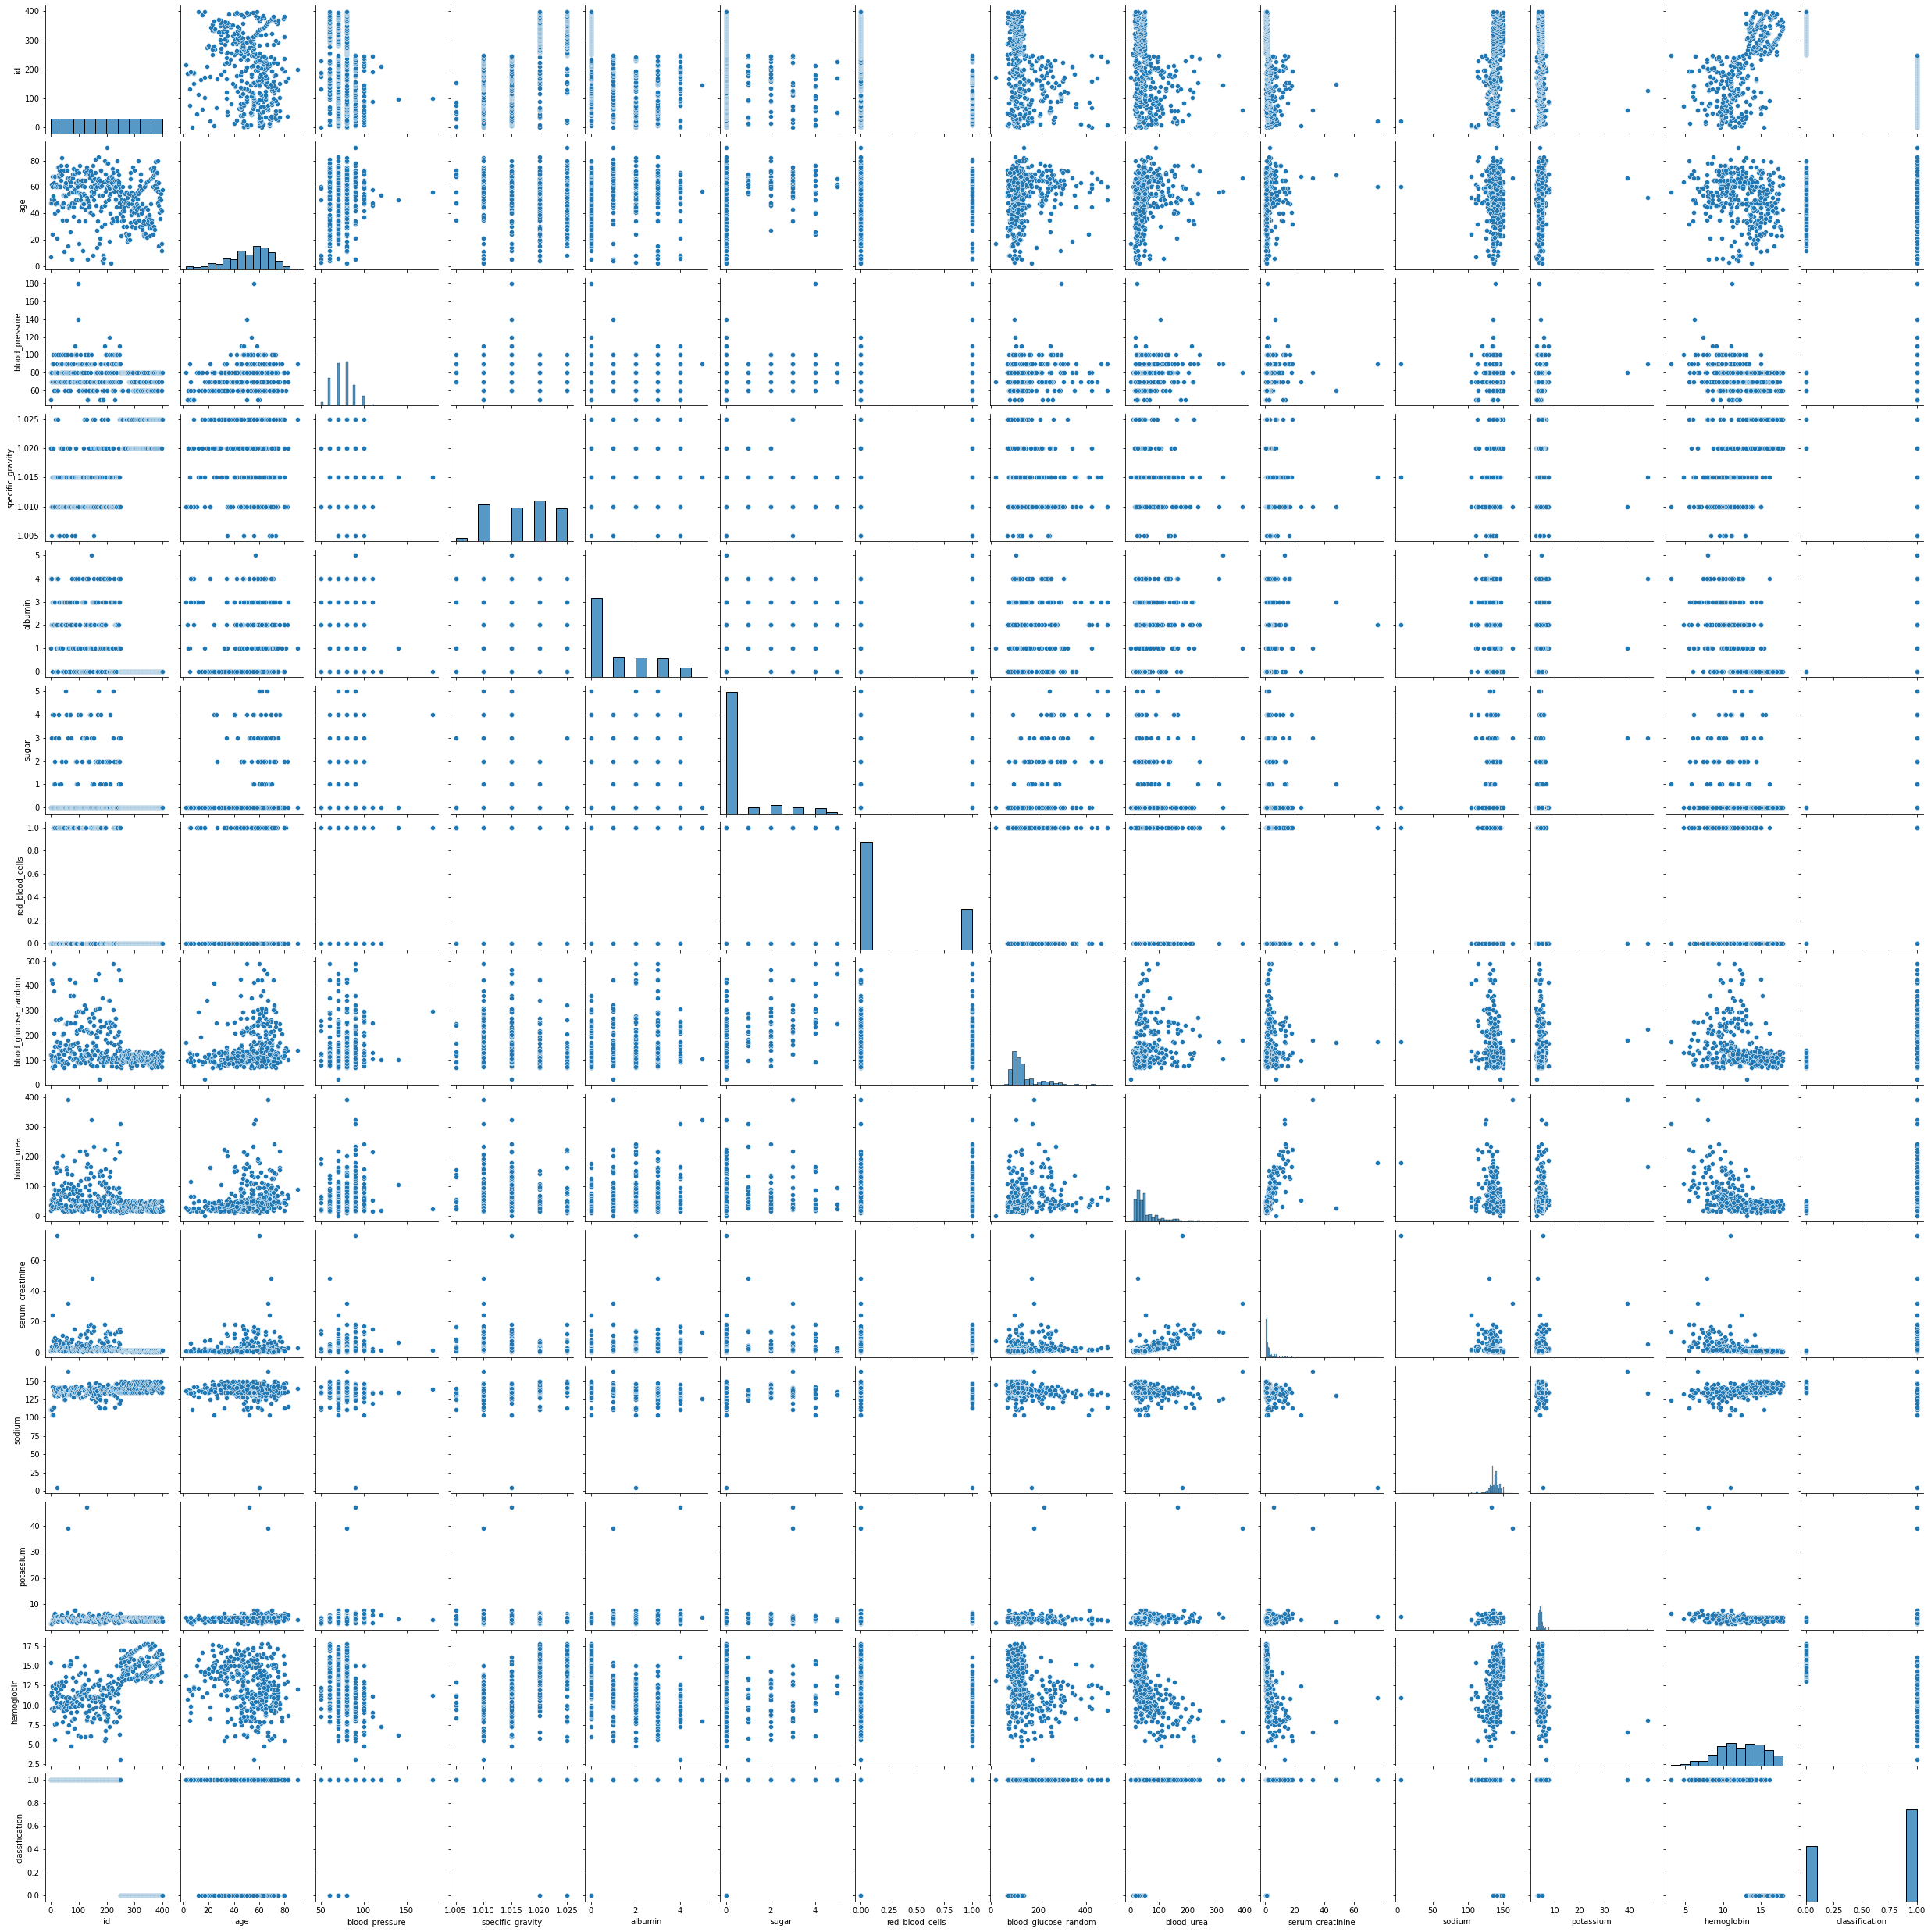

In [30]:
sns.pairplot(df)

**Here age seems to be slightly left skewed,blood glucose and urea seems to be bit rightly skewed and rest of the features seemed to be lightly skewed**

c:\users\admin\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\admin\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\admin\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


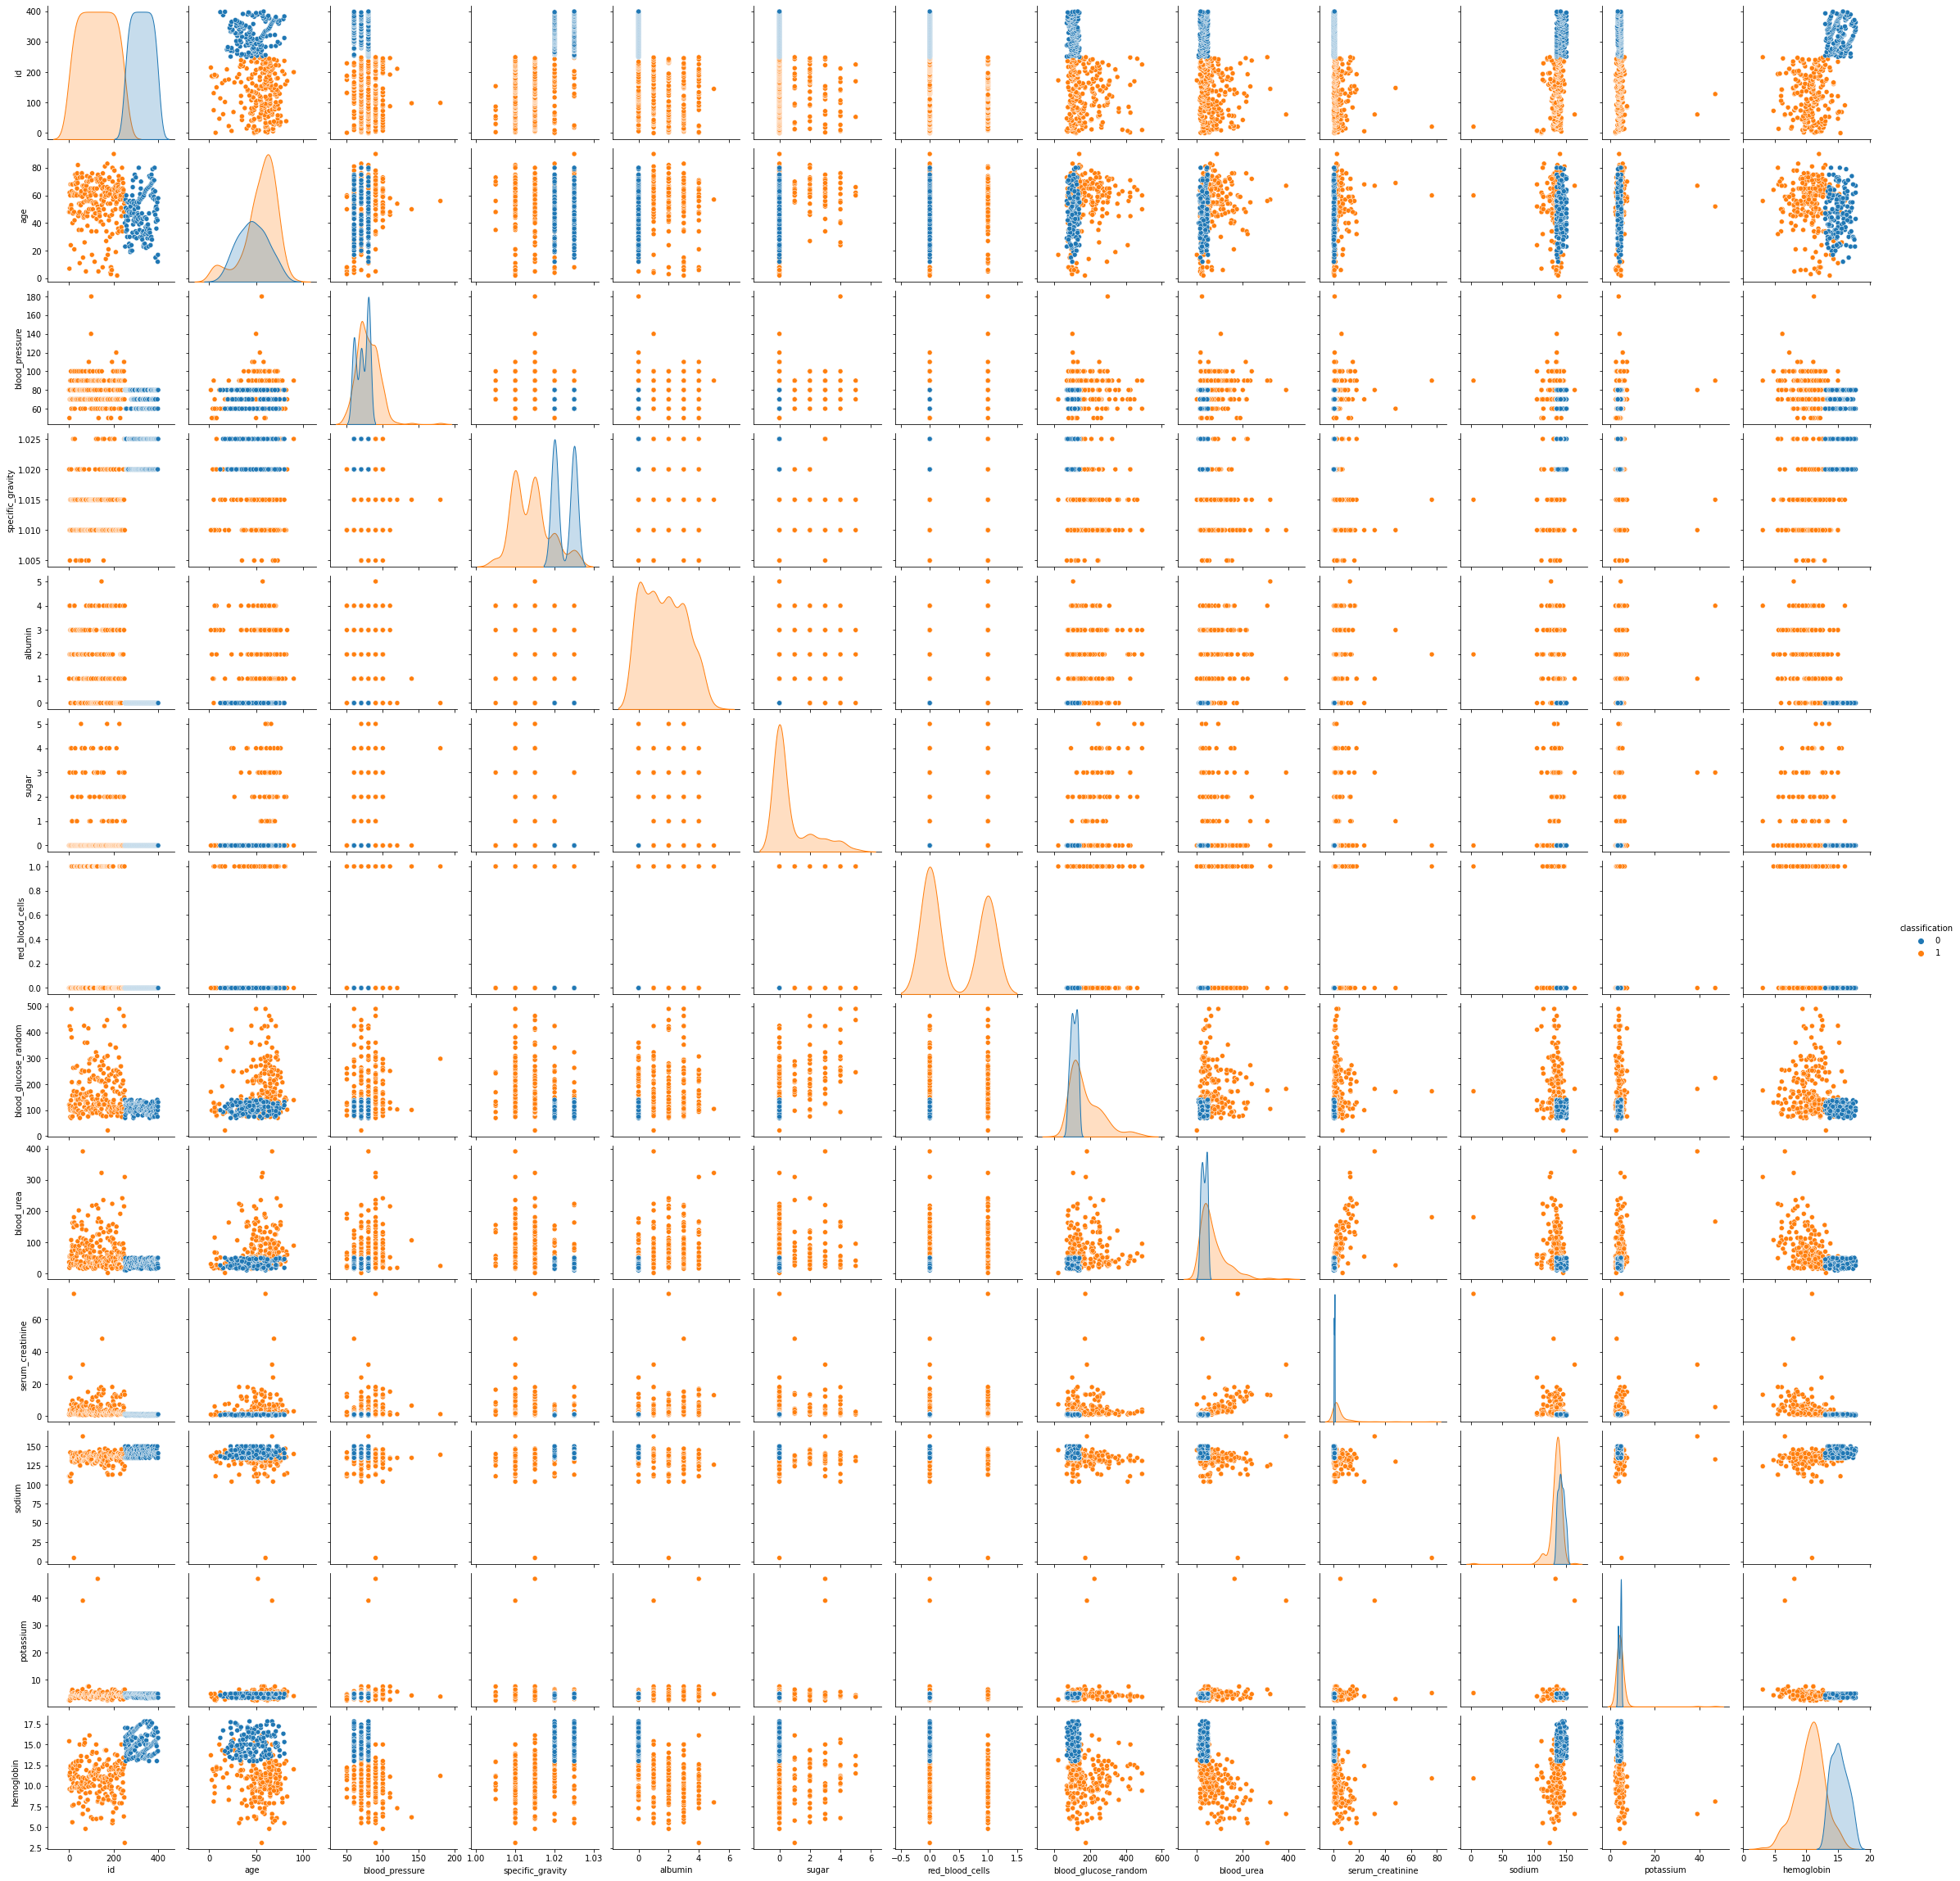

In [31]:
sns.pairplot(df,hue='classification')

 Let's explore the correalation between random variables.....
 
 
**Correlation Analysis is super useful when you want to understand the relationship among variables (columns).**

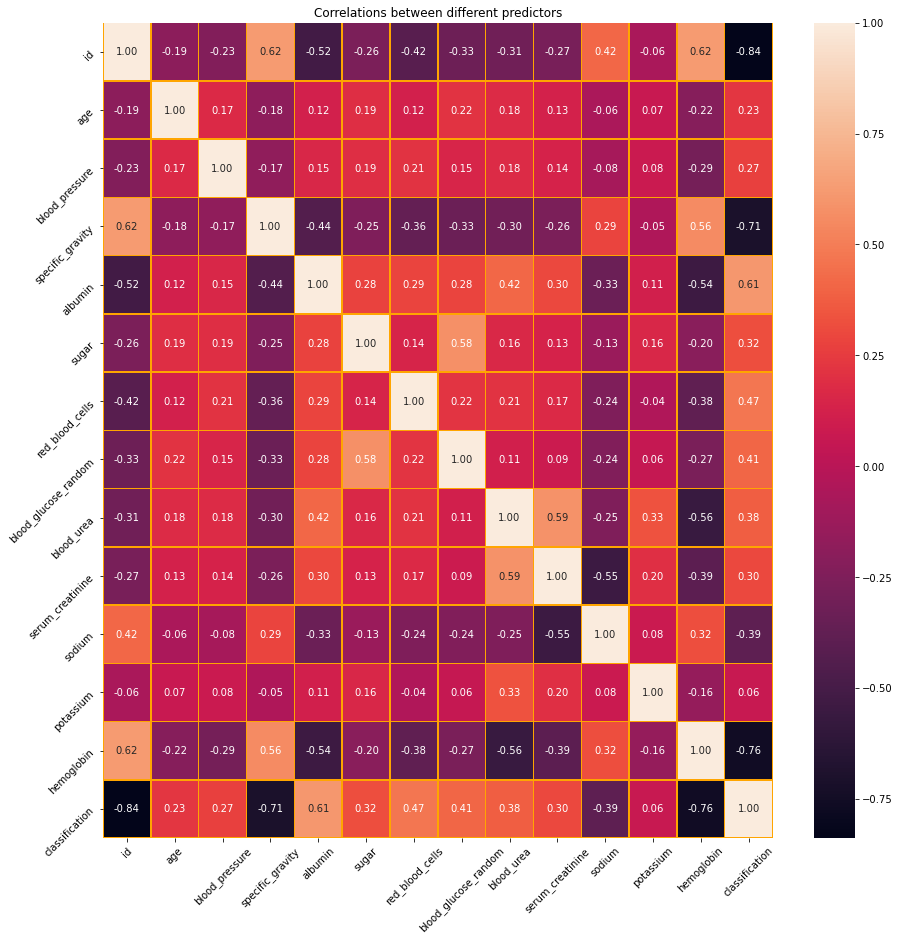

In [32]:
corr_df = df.corr()
f,ax=plt.subplots(figsize=(15,15))
sns.heatmap(corr_df,annot=True,fmt=".2f",ax=ax,linewidths=0.5,linecolor="orange")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.title('Correlations between different predictors')
plt.show()

**Positive Correlation:**

hemoglobin->  red_blood_cell_count,packed_cell_volume, specific_gravity


red_blood_cell_count -> packed_cell_volume,specific_gravity


specific_gravity -> packed_cell_volume


blood_glucose_random -> sugar


serum_creatinine -> blood_urea


Albumin, Blood urea -> Red blood cell count, packed cell volume, Hemoglobin


Serum creatinine -> Sodium

**Negative correlation**


Albumin -> hemoglobin, packed_cell_volume,specific_gravity,red_blood_cell_count


serum_creatinine -> sodium


blood_urea -> hemoglobin, packed_cell_volume,red_blood_cell_count


**Filling Missing Values with KNNImputer**

In [33]:
# define imputer
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')

In [34]:
impute_columns=list(set(df.columns)-set(["classification"]))
print(impute_columns)

['blood_glucose_random', 'albumin', 'potassium', 'hypertension', 'pus_cell_clumps', 'blood_urea', 'blood_pressure', 'coronary_artery_disease', 'red_blood_cells', 'sugar', 'appetite', 'bacteria', 'pus_cell', 'pedal_edema', 'sodium', 'hemoglobin', 'serum_creatinine', 'white_blood_cell_count', 'diabetes_mellitus', 'id', 'specific_gravity', 'red_blood_cell_count', 'age', 'anemia', 'packed_cell_volume']


In [35]:
imputer.fit(df[impute_columns])

KNNImputer()

In [36]:
X_new=pd.DataFrame(imputer.transform(df[impute_columns]), columns=impute_columns)

In [37]:
X_new.head()

,blood_glucose_random,albumin,potassium,hypertension,pus_cell_clumps,blood_urea,blood_pressure,coronary_artery_disease,red_blood_cells,sugar,...,hemoglobin,serum_creatinine,white_blood_cell_count,diabetes_mellitus,id,specific_gravity,red_blood_cell_count,age,anemia,packed_cell_volume
0,121.0,1.0,2.5,1.0,0.0,36.0,80.0,0.0,0.0,0.0,...,15.4,1.2,7800.0,1.0,0.0,1.020,5.20,48.0,0.0,44.0
1,121.0,4.0,2.5,0.0,0.0,18.0,50.0,0.0,0.0,0.0,...,11.3,0.8,6000.0,0.0,1.0,1.020,3.94,7.0,0.0,38.0
2,423.0,2.0,2.5,0.0,0.0,53.0,80.0,0.0,0.0,3.0,...,9.6,1.8,7500.0,1.0,2.0,1.010,3.88,62.0,1.0,31.0
3,117.0,4.0,2.5,1.0,1.0,56.0,70.0,0.0,0.0,0.0,...,11.2,3.8,6700.0,0.0,3.0,1.005,3.90,48.0,1.0,32.0
4,106.0,2.0,2.5,0.0,0.0,26.0,80.0,0.0,0.0,0.0,...,11.6,1.4,7300.0,0.0,4.0,1.010,4.60,51.0,0.0,35.0


In [38]:
print (round((X_new.isnull().sum() * 100/ len(X_new)),2).sort_values(ascending=False))

packed_cell_volume         0.0
bacteria                   0.0
albumin                    0.0
potassium                  0.0
hypertension               0.0
pus_cell_clumps            0.0
blood_urea                 0.0
blood_pressure             0.0
coronary_artery_disease    0.0
red_blood_cells            0.0
sugar                      0.0
appetite                   0.0
pus_cell                   0.0
anemia                     0.0
pedal_edema                0.0
sodium                     0.0
hemoglobin                 0.0
serum_creatinine           0.0
white_blood_cell_count     0.0
diabetes_mellitus          0.0
id                         0.0
specific_gravity           0.0
red_blood_cell_count       0.0
age                        0.0
blood_glucose_random       0.0
dtype: float64


In [39]:
X=X_new[X_new["id"].isin(df["id"])].drop(["id"],axis=1)

In [40]:
X.head()

,blood_glucose_random,albumin,potassium,hypertension,pus_cell_clumps,blood_urea,blood_pressure,coronary_artery_disease,red_blood_cells,sugar,...,sodium,hemoglobin,serum_creatinine,white_blood_cell_count,diabetes_mellitus,specific_gravity,red_blood_cell_count,age,anemia,packed_cell_volume
0,121.0,1.0,2.5,1.0,0.0,36.0,80.0,0.0,0.0,0.0,...,111.0,15.4,1.2,7800.0,1.0,1.020,5.20,48.0,0.0,44.0
1,121.0,4.0,2.5,0.0,0.0,18.0,50.0,0.0,0.0,0.0,...,111.0,11.3,0.8,6000.0,0.0,1.020,3.94,7.0,0.0,38.0
2,423.0,2.0,2.5,0.0,0.0,53.0,80.0,0.0,0.0,3.0,...,111.0,9.6,1.8,7500.0,1.0,1.010,3.88,62.0,1.0,31.0
3,117.0,4.0,2.5,1.0,1.0,56.0,70.0,0.0,0.0,0.0,...,111.0,11.2,3.8,6700.0,0.0,1.005,3.90,48.0,1.0,32.0
4,106.0,2.0,2.5,0.0,0.0,26.0,80.0,0.0,0.0,0.0,...,111.0,11.6,1.4,7300.0,0.0,1.010,4.60,51.0,0.0,35.0


In [41]:
y=df["classification"]

In [42]:
y

0      1
1      1
2      1
3      1
4      1
      ..
395    0
396    0
397    0
398    0
399    0
Name: classification, Length: 400, dtype: int64

In [43]:
y.dropna(axis=0)

0      1
1      1
2      1
3      1
4      1
      ..
395    0
396    0
397    0
398    0
399    0
Name: classification, Length: 400, dtype: int64

In [44]:
y.shape

(400,)

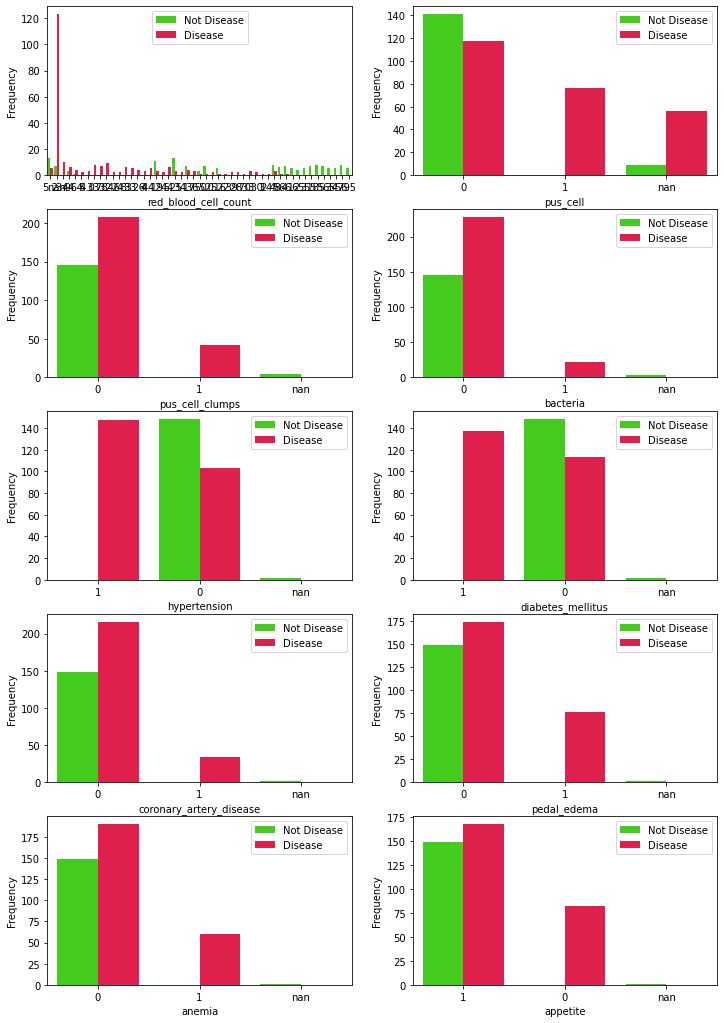

In [45]:
fig, axes = plt.subplots(5, 2, figsize=(12,18))
fs = ["red_blood_cell_count","pus_cell","pus_cell_clumps","bacteria","hypertension","diabetes_mellitus","coronary_artery_disease","pedal_edema","anemia","appetite"]
for i, axi in enumerate(axes.flat):
    sns.countplot(x=fs[i], hue='classification', data=df, palette='prism', ax=axi) 
    axi.set(ylabel='Frequency')
    axi.legend(["Not Disease", "Disease"])

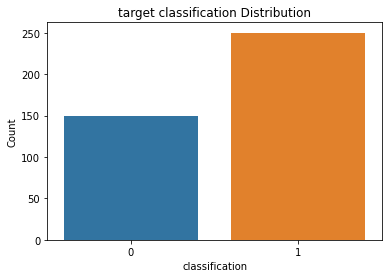

In [46]:
sns.countplot(x='classification',data=df)
plt.xlabel("classification")
plt.ylabel("Count")
plt.title("target classification Distribution")
plt.show()

**Hence,no imbalance in the target feature**

In [47]:
X.head()

,blood_glucose_random,albumin,potassium,hypertension,pus_cell_clumps,blood_urea,blood_pressure,coronary_artery_disease,red_blood_cells,sugar,...,sodium,hemoglobin,serum_creatinine,white_blood_cell_count,diabetes_mellitus,specific_gravity,red_blood_cell_count,age,anemia,packed_cell_volume
0,121.0,1.0,2.5,1.0,0.0,36.0,80.0,0.0,0.0,0.0,...,111.0,15.4,1.2,7800.0,1.0,1.020,5.20,48.0,0.0,44.0
1,121.0,4.0,2.5,0.0,0.0,18.0,50.0,0.0,0.0,0.0,...,111.0,11.3,0.8,6000.0,0.0,1.020,3.94,7.0,0.0,38.0
2,423.0,2.0,2.5,0.0,0.0,53.0,80.0,0.0,0.0,3.0,...,111.0,9.6,1.8,7500.0,1.0,1.010,3.88,62.0,1.0,31.0
3,117.0,4.0,2.5,1.0,1.0,56.0,70.0,0.0,0.0,0.0,...,111.0,11.2,3.8,6700.0,0.0,1.005,3.90,48.0,1.0,32.0
4,106.0,2.0,2.5,0.0,0.0,26.0,80.0,0.0,0.0,0.0,...,111.0,11.6,1.4,7300.0,0.0,1.010,4.60,51.0,0.0,35.0


In [48]:
y=df["classification"]

In [49]:
X=pd.DataFrame(X)

In [50]:
y

0      1
1      1
2      1
3      1
4      1
      ..
395    0
396    0
397    0
398    0
399    0
Name: classification, Length: 400, dtype: int64

In [51]:
print(X.shape)
print(y.shape)

(400, 24)
(400,)


In [52]:
##Split train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 4658)

In [53]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(320, 24)
(80, 24)
(320,)
(80,)


In [54]:
y_train.dropna(axis=0)

97     1
9      1
383    0
100    1
190    1
      ..
236    1
35     1
259    0
199    1
217    1
Name: classification, Length: 320, dtype: int64

In [55]:
y_test.dropna(axis=0)

204    1
329    0
296    0
174    1
262    0
      ..
203    1
251    0
168    1
101    1
248    1
Name: classification, Length: 80, dtype: int64

In [56]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix 

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report,accuracy_score

In [57]:
#fitting SVM to the training set
svm = SVC(kernel='linear', random_state=0)
svm.fit(X_train,y_train)

SVC(kernel='linear', random_state=0)

In [58]:
#predictin the test result
y_pred_svm = svm.predict(X_test) 

In [59]:
score_svm = accuracy_score(y_pred_svm,y_test)
score_svm

0.9875

In [60]:
print("train score - " + str(svm.score(X_train, y_train)))
print("test score - " + str(svm.score(X_test, y_test)))

train score - 0.990625
test score - 0.9875


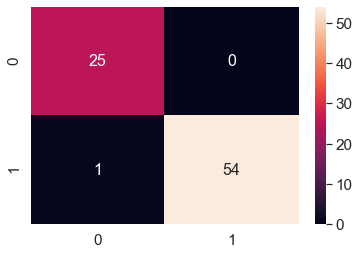

In [61]:
#Making the Confusion Matrix
cm_svm = confusion_matrix(y_test,y_pred_svm)

sns.set(font_scale=1.4) # for label size
sns.heatmap(cm_svm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

In [62]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        25
           1       1.00      0.98      0.99        55

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



In [63]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import GridSearchCV 

c_space = np.logspace(-5, 8, 15) 
param_grid = {'C': c_space} 

lr = LogisticRegression() 

lr = GridSearchCV(lr, param_grid, cv = 5) 

lr.fit(X_train, y_train) 
# Print the tuned parameters and score 
print("Tuned Logistic Regression Parameters: {}".format(lr.best_params_)) 
print("Best score is {}".format(lr.best_score_))

c:\users\admin\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\admin\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.or

c:\users\admin\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\admin\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.or

c:\users\admin\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\admin\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.or

c:\users\admin\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\admin\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.or

Tuned Logistic Regression Parameters: {'C': 268.2695795279727}
Best score is 0.946875


c:\users\admin\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [77]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [79]:
y_pred_lr = lr.predict(X_test)
accuracy_lr=accuracy_score(y_test, y_pred_lr)
print("Accuracy of Logistic Regression is :", accuracy_lr)

Accuracy of Logistic Regression is : 0.9125


In [65]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

knn=KNeighborsClassifier(n_neighbors=6) 
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=6)

In [66]:
knn_pred=knn.predict(X_test)

f1_knn=f1_score(y_test,knn_pred)


precision_knn = precision_score(y_test, knn_pred)


recall_knn = recall_score(y_test, knn_pred)




print("KNN f1 score: ",f1_knn)
print("KNN Precision: ",precision_knn)
print("KNN Recall: ", recall_knn)
print("KNN accuracy score: ",knn.score(X_test,y_test))

KNN f1 score:  0.7216494845360825
KNN Precision:  0.8333333333333334
KNN Recall:  0.6363636363636364
KNN accuracy score:  0.6625


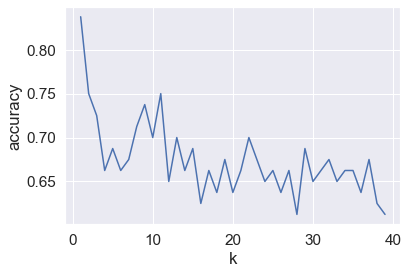

In [67]:
import matplotlib.pyplot as plt
score_list=[]

for each in range(1,40):
    knn2=KNeighborsClassifier(n_neighbors=each)
    knn2.fit(X_train,y_train)
    score_list.append(knn2.score(X_test,y_test))
plt.plot(range(1,40),score_list)
plt.xlabel("k")
plt.ylabel("accuracy")
plt.show()

In [68]:
#fitting KNN to the training set
knn= KNeighborsClassifier(n_neighbors=5 , metric='minkowski',p=2  )
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [69]:
#predictin the test result
y_pred_knn = knn.predict(X_test) 

In [70]:
#calculate accuracy
score_dtc = accuracy_score(y_pred_knn,y_test)
score_dtc

0.6875

In [71]:
print("train score - " + str(knn.score(X_train, y_train)))
print("test score - " + str(knn.score(X_test, y_test)))

train score - 0.83125
test score - 0.6875


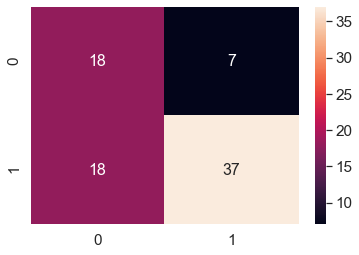

In [72]:
#Making the Confusion Matrix
cm_knn = confusion_matrix(y_test,y_pred_knn)

sns.set(font_scale=1.4) # for label size
sns.heatmap(cm_knn, annot=True, annot_kws={"size": 16}) # font size

plt.show()

In [73]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [74]:
dt_pred=dt.predict(X_test)


f1_dt=f1_score(y_test,dt_pred)



precision_dt = precision_score(y_test, dt_pred)


recall_dt = recall_score(y_test, dt_pred)


print("DT f1 score: ",f1_dt)
print("DT Precision: ",precision_dt)
print("DT Recall: ",recall_dt)
print("DT accuracy score: ",dt.score(X_test,y_test))

DT f1 score:  0.9908256880733944
DT Precision:  1.0
DT Recall:  0.9818181818181818
DT accuracy score:  0.9875


In [75]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,random_state=1)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

In [76]:
rf_pred=rf.predict(X_test)



f1_rf=f1_score(y_test,rf_pred)


precision_rf = precision_score(y_test, rf_pred)


recall_rf = recall_score(y_test, rf_pred)



print("RF f1 score: ",f1_rf)
print("RF Precision: ",precision_rf)
print("RF Recall:",recall_rf)
print("RF accuracy score: ",rf.score(X_test,y_test))

RF f1 score:  1.0
RF Precision:  1.0
RF Recall: 1.0
RF accuracy score:  1.0
